In [65]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [66]:
# Load the datasets
diab = pd.read_csv("/content/diabetes.csv")
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
# First five rows
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
# Checking the dataset
diab.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
531,0,107,76,0,0,45.3,0.686,24,0


In [69]:
# Checking the null values

diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
# Split datasets in features and target variables
diab_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = diab[diab_cols]
y = diab.Outcome

In [71]:
# Spliting the datasets into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1 )

In [72]:
# Create decision tree classifier object
dtc = DecisionTreeClassifier()

# Train decision tree classifier
dtc = dtc.fit(x_train,y_train)

# Predict the response for taste dataset
y_pred = dtc.predict(x_test)

In [73]:
# Model accuracy
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.6753246753246753


In [74]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

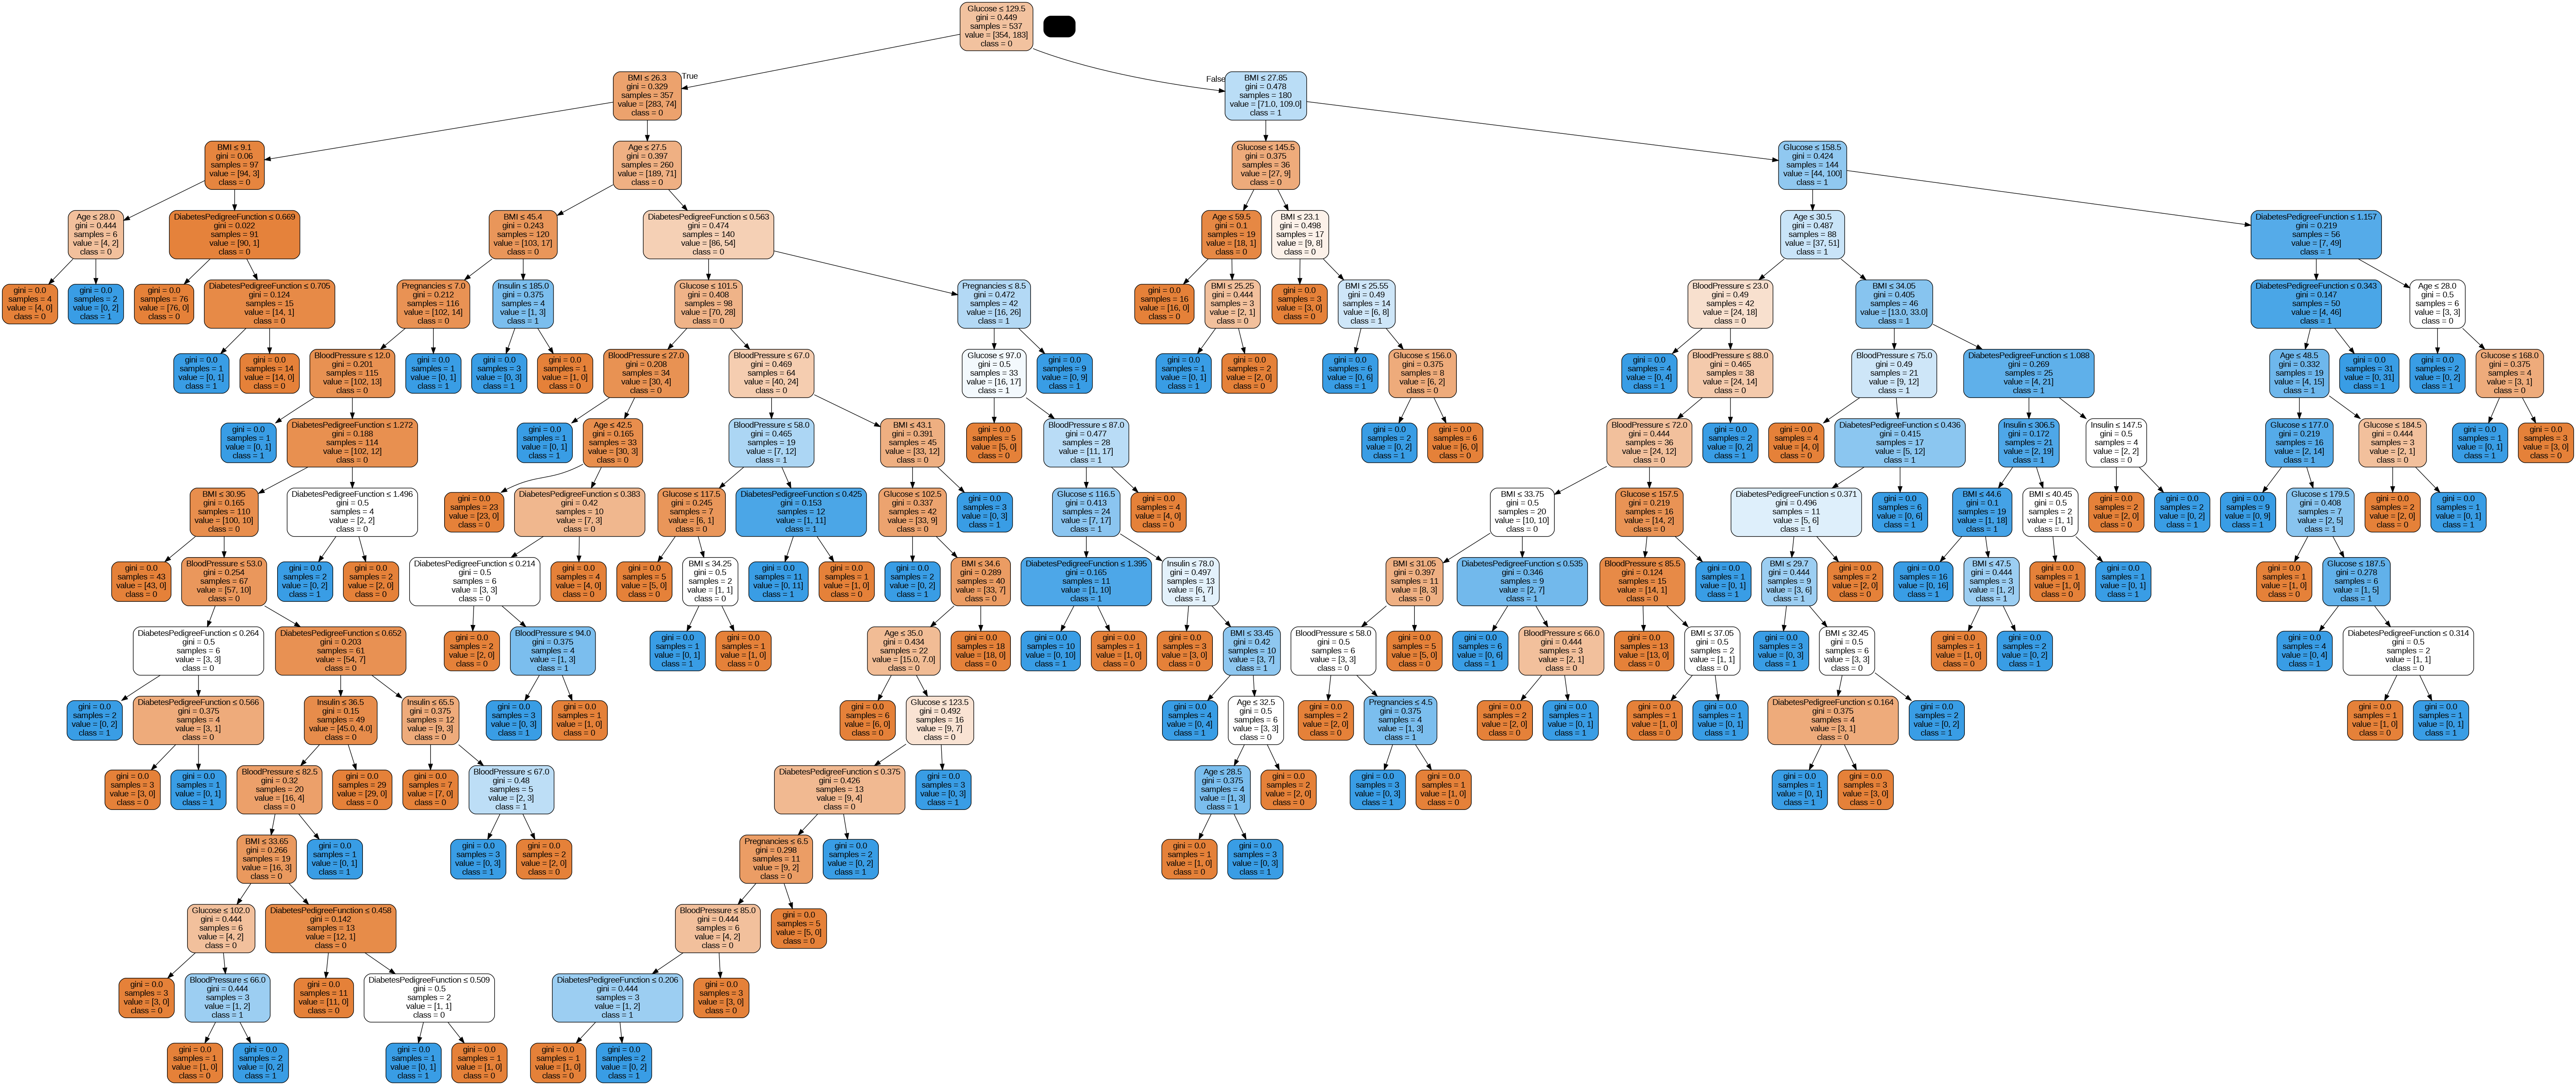

In [75]:
# Visualization
tree_data = StringIO()
export_graphviz(dtc, out_file = tree_data, filled = True, rounded = True, special_characters = True, feature_names = diab_cols, class_names = ['0', '1'])
tree = pydotplus.graph_from_dot_data(tree_data.getvalue())
tree.write_png("Diabetes.png")
Image(tree.create_png())

In [76]:
#Improving the model
dtc = DecisionTreeClassifier(criterion ='entropy', max_depth = 3)
dtc = dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7705627705627706


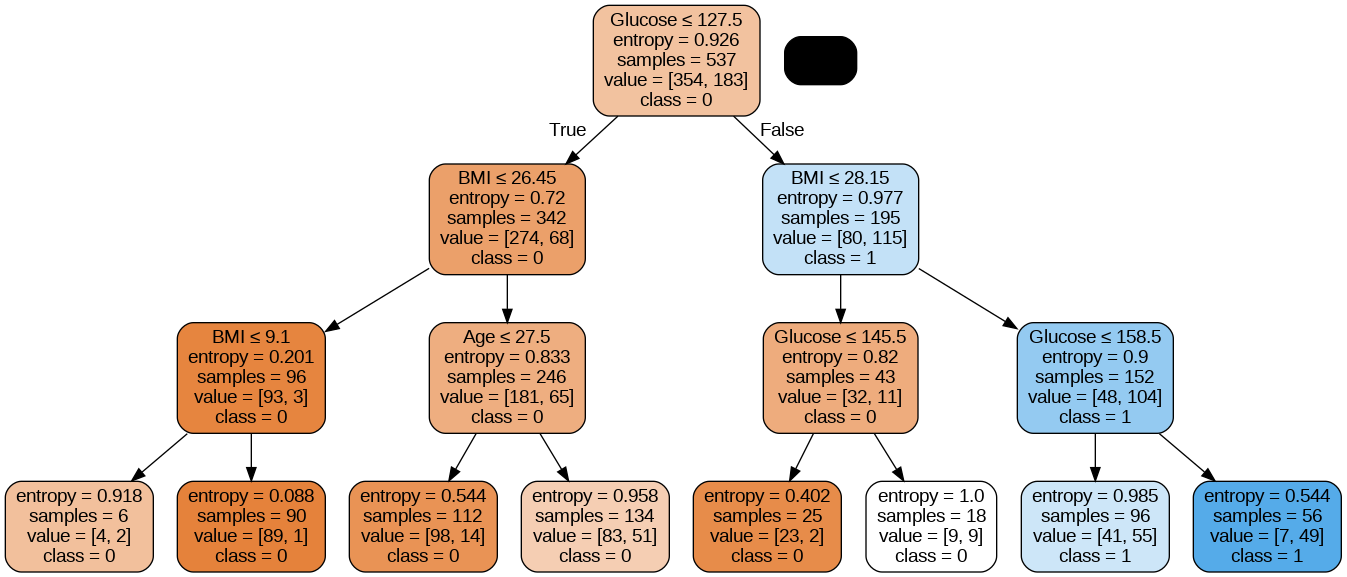

In [77]:
# Visualization
tree_data = StringIO()
export_graphviz(dtc, out_file = tree_data, filled = True, rounded = True, special_characters = True, feature_names = diab_cols, class_names = ['0', '1'])
tree = pydotplus.graph_from_dot_data(tree_data.getvalue())
tree.write_png("Diabetes.png")
Image(tree.create_png())